In [1]:
from pprint import pprint
from langchain_core.messages import AIMessage, HumanMessage

messages = [AIMessage(content=f"So you said you were researching ocean mammals?", name="Model")]
messages.append(HumanMessage(content=f"Yes, that's right.",name="Lance"))
messages.append(AIMessage(content=f"Great, what would you like to learn about.", name="Model"))
messages.append(HumanMessage(content=f"I want to learn about the best place to see Orcas in the US.", name="Lance"))

for m in messages:
    m.pretty_print()

================================== Ai Message ==================================
Name: Model

So you said you were researching ocean mammals?
================================ Human Message =================================
Name: Lance

Yes, that's right.
================================== Ai Message ==================================
Name: Model

Great, what would you like to learn about.
================================ Human Message =================================
Name: Lance

I want to learn about the best place to see Orcas in the US.


In [2]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [3]:
from langchain_groq import ChatGroq

llm=ChatGroq(model="llama-3.1-8b-instant")
result=llm.invoke(messages)
result

AIMessage(content="Orcas, also known as killer whales, can be found in various locations in the US. One of the best places to see them is in the Pacific Northwest, particularly in Puget Sound and the surrounding waters.\n\nSan Juan Islands, Washington, is a famous destination for orca sightings. The San Juan Islands are home to a resident population of orcas, known as the Southern Resident orcas. These orcas are known for their unique dialects and social behaviors.\n\nThe best time to see orcas in the San Juan Islands is from April to October, when they are most active in the area. There are several tour operators that offer guided tours to spot orcas and other marine wildlife, such as whales, dolphins, and seals.\n\nSome popular tour operators in the area include:\n\n1. Puget Sound Express: Offers 6-hour and 12-hour tours to see orcas and other marine wildlife.\n2. San Juan Safaris: Offers 3-hour, 6-hour, and 12-hour tours to see orcas and other marine wildlife.\n3. Orca behavior Inst

In [4]:
def add(a:int,b:int)-> int:
    """Add a and b.

    Args:
        a: first int
        b: second int
    """
    return a+b

In [5]:
llm_with_tools=llm.bind_tools([add])

In [6]:
tool_call=llm_with_tools.invoke([HumanMessage(content=f"What is 2 plus 3", name="Lance")])
tool_call

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'kv77rs21b', 'function': {'arguments': '{"a":2,"b":3}', 'name': 'add'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 231, 'total_tokens': 249, 'completion_time': 0.019787074, 'prompt_time': 0.012824928, 'queue_time': 0.055779772, 'total_time': 0.032612002}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_ff2b098aaf', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--30dc9415-40a1-4638-805d-c241da87e60a-0', tool_calls=[{'name': 'add', 'args': {'a': 2, 'b': 3}, 'id': 'kv77rs21b', 'type': 'tool_call'}], usage_metadata={'input_tokens': 231, 'output_tokens': 18, 'total_tokens': 249})

In [7]:
tool_call.tool_calls

[{'name': 'add',
  'args': {'a': 2, 'b': 3},
  'id': 'kv77rs21b',
  'type': 'tool_call'}]

In [8]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages

class MessageState(TypedDict):
    messages:Annotated[list[AnyMessage],add_messages]

In [9]:
initial_message=[AIMessage(content="Hello! How can I assist you?", name="Model"),
                    HumanMessage(content="I'm looking for information on generative ai.", name="Krish")
                   ]
# New message to add
new_message = AIMessage(content="Sure, I can help with that. What specifically are you interested in?", name="Model")

add_messages(initial_message,new_message)

[AIMessage(content='Hello! How can I assist you?', additional_kwargs={}, response_metadata={}, name='Model', id='7f6d7f6e-ff19-46c5-bfd5-04fd4a07219a'),
 HumanMessage(content="I'm looking for information on generative ai.", additional_kwargs={}, response_metadata={}, name='Krish', id='e2d232f1-525b-48cc-b609-a3784d8e3ea4'),
 AIMessage(content='Sure, I can help with that. What specifically are you interested in?', additional_kwargs={}, response_metadata={}, name='Model', id='c8c01b27-895a-4528-ae08-c4c7128add2f')]

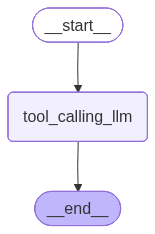

In [10]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
    
# Node
def tool_calling_llm(state: MessageState):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

# Build graph
builder = StateGraph(MessageState)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_edge(START, "tool_calling_llm")
builder.add_edge("tool_calling_llm", END)
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [24]:
def minus(a:int, b:int)->int:
    """subtract a and b.

    Args:
        a: first int
        b: second int
    """
    return a-b

In [20]:
from langchain_openai import ChatOpenAI

def multiply(a: int, b: int) -> int:
    """Multiply a and b.

    Args:
        a: first int
        b: second int
    """
    return a * b

In [30]:
llm_with_tools = llm.bind_tools([multiply,add,minus])

In [31]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.graph import MessagesState




In [23]:
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

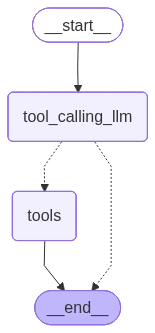

In [32]:
# Node
def tool_calling_llm(state: MessagesState):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

# Build graph
builder = StateGraph(MessagesState)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode([multiply,add, minus]))

builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", END)
#builder.add_edge("tool2", END)
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [33]:
from langchain_core.messages import HumanMessage
messages = [HumanMessage(content="Add 3 and 4. Multiply the output by 2 and add 5. and subtract 3 from that")]
messages = graph.invoke({"messages": messages})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Add 3 and 4. Multiply the output by 2 and add 5. and subtract 3 from that
================================== Ai Message ==================================
Tool Calls:
  add (6zhz0y1e2)
 Call ID: 6zhz0y1e2
  Args:
    a: 3
    b: 4
  multiply (25hgmr9g5)
 Call ID: 25hgmr9g5
  Args:
    a: 7
    b: 2
  add (048374bc4)
 Call ID: 048374bc4
  Args:
    a: 14
    b: 5
  minus (h10yft9za)
 Call ID: h10yft9za
  Args:
    a: 19
    b: 3
================================= Tool Message =================================
Name: add

7
================================= Tool Message =================================
Name: multiply

14
================================= Tool Message =================================
Name: add

19
================================= Tool Message =================================
Name: minus

16
